In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import wrangle

In [2]:
cosa = wrangle.full_daily_COSA_dataframe()

In [3]:
cosa_train, cosa_validate, cosa_test = wrangle.split_data(cosa)

In [4]:
cosa.head()

,celsius,farenheit,humidity,dewpoint_celsius,dewpoint_farenheit,pressure,Pm1_0,Pm2_5,Pm10,CO,...,NoiseLevel_db,sensor_to_water_feet,sensor_to_water_meters,sensor_to_ground_feet,sensor_to_ground_meters,flood_depth_feet,flood_depth_meters,AQI_CO,AQI_pm2_5,AQI_pm10
datetime,,,,,,,,,,,,,,,,,,,,,
2021-04-20,20.89,69.56,45.79,7.67,45.80,988.08,5.193732,8.022792,7.324786,0.299145,...,66.23,13.24,4.04,13.5,4.12,0.26,0.08,Good,Good,Good
2021-04-21,15.32,59.60,36.49,-0.31,31.43,985.50,2.968750,3.616477,4.460227,0.144886,...,66.66,13.34,4.07,13.5,4.12,0.16,0.05,Good,Good,Good
2021-04-22,16.00,60.85,67.74,9.64,49.35,979.65,16.866477,18.247159,22.963068,0.056818,...,66.20,13.30,4.05,13.5,4.12,0.21,0.06,Good,Moderate,Good
2021-04-23,22.51,72.46,85.76,19.65,67.37,971.28,18.123563,19.209770,23.916667,0.166667,...,66.40,13.00,3.96,13.5,4.12,0.50,0.15,Good,Moderate,Good
2021-04-24,24.97,76.97,50.29,10.99,51.78,974.48,3.804533,4.458924,51.232295,0.405099,...,64.81,13.13,4.00,13.5,4.12,0.37,0.11,Good,Good,Good


In [5]:
cosa['noise_alert'] = pd.cut(cosa.NoiseLevel_db, 
                            bins = [-1,46,66,81,101,4000],
                            labels = ['Normal', 'Moderate', 
                                      'Loud', "Very Loud", 
                                      "Extremely Loud"])

___
# Explore Flood

No handles with labels found to put in legend.


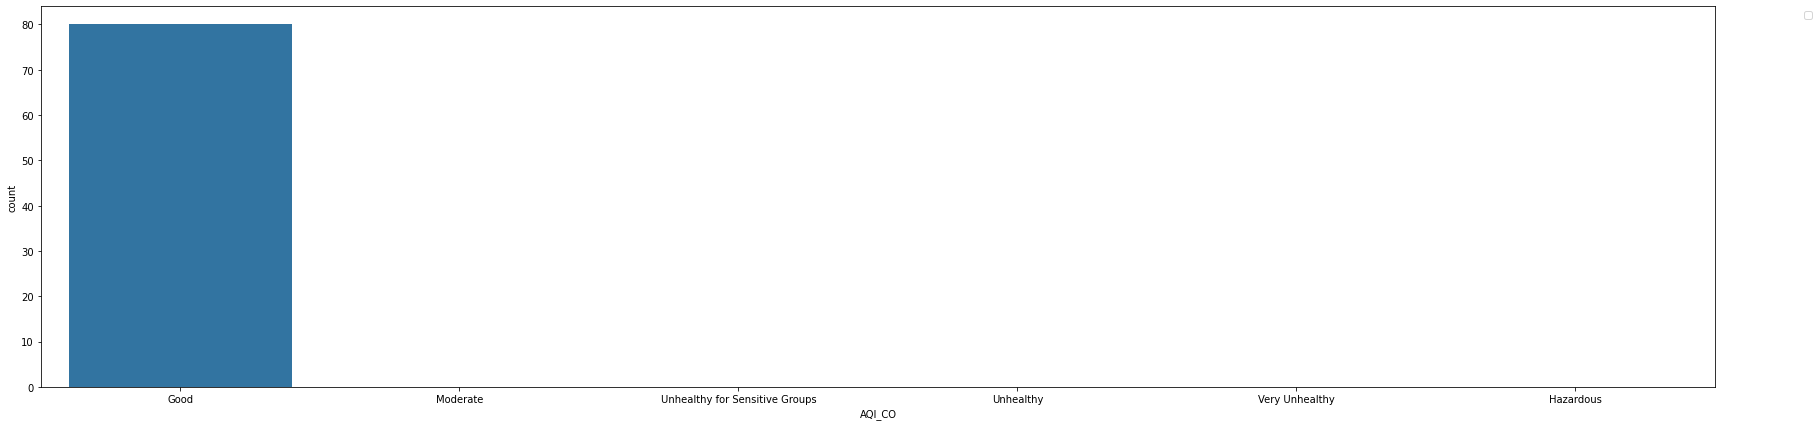

In [6]:
plt.figure(figsize=(30,7))
sns.countplot(data=cosa, x='AQI_CO')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)

No handles with labels found to put in legend.


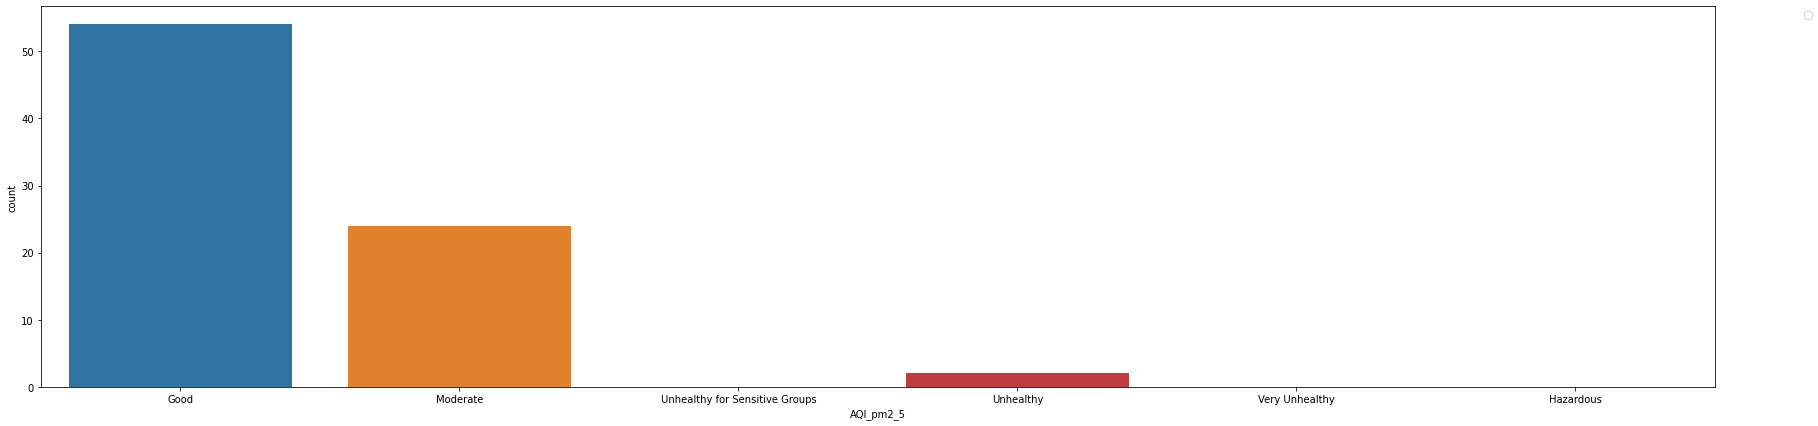

In [7]:
plt.figure(figsize=(30,7))
sns.countplot(data=cosa, x='AQI_pm2_5')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)

No handles with labels found to put in legend.


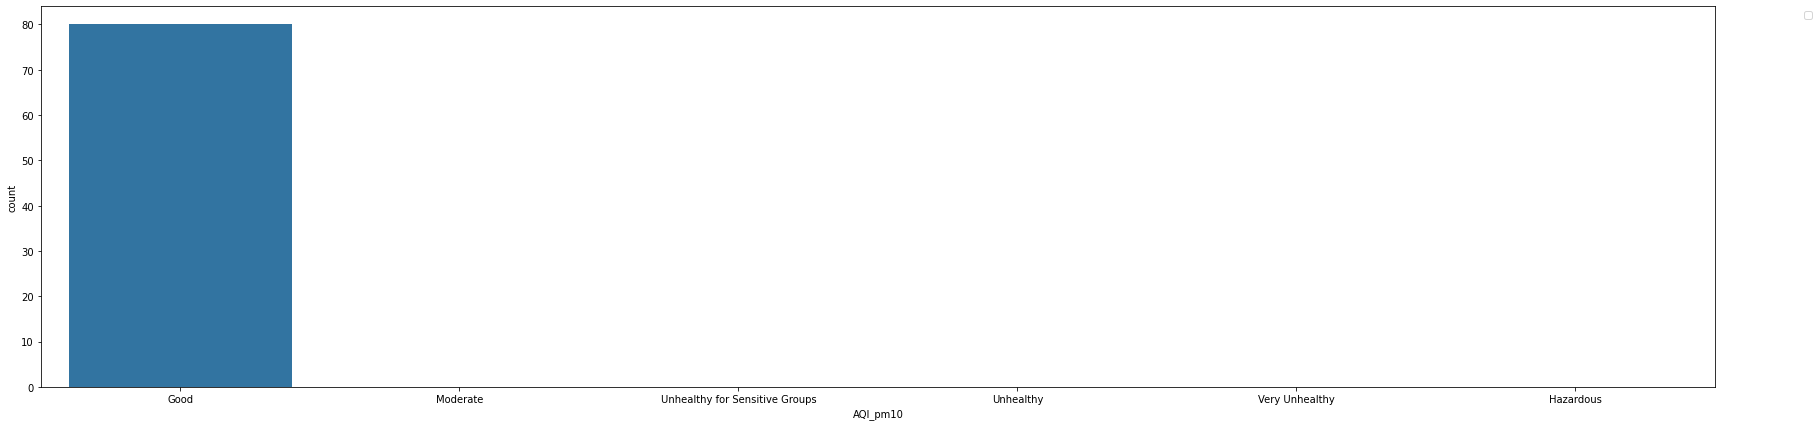

In [8]:
plt.figure(figsize=(30,7))
sns.countplot(data=cosa, x='AQI_pm10')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)

### Takeaways:
- 

___

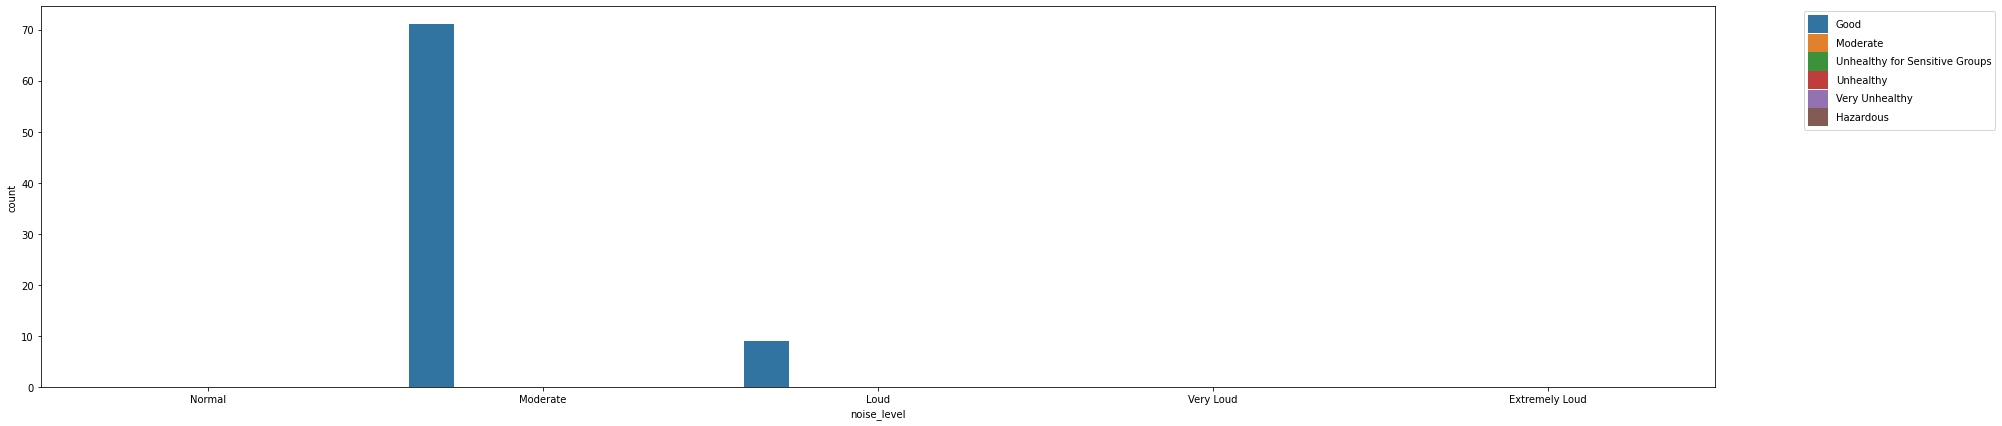

In [9]:
plt.figure(figsize=(30,7))
sns.countplot(data=cosa, x='noise_level', hue='AQI_CO')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)

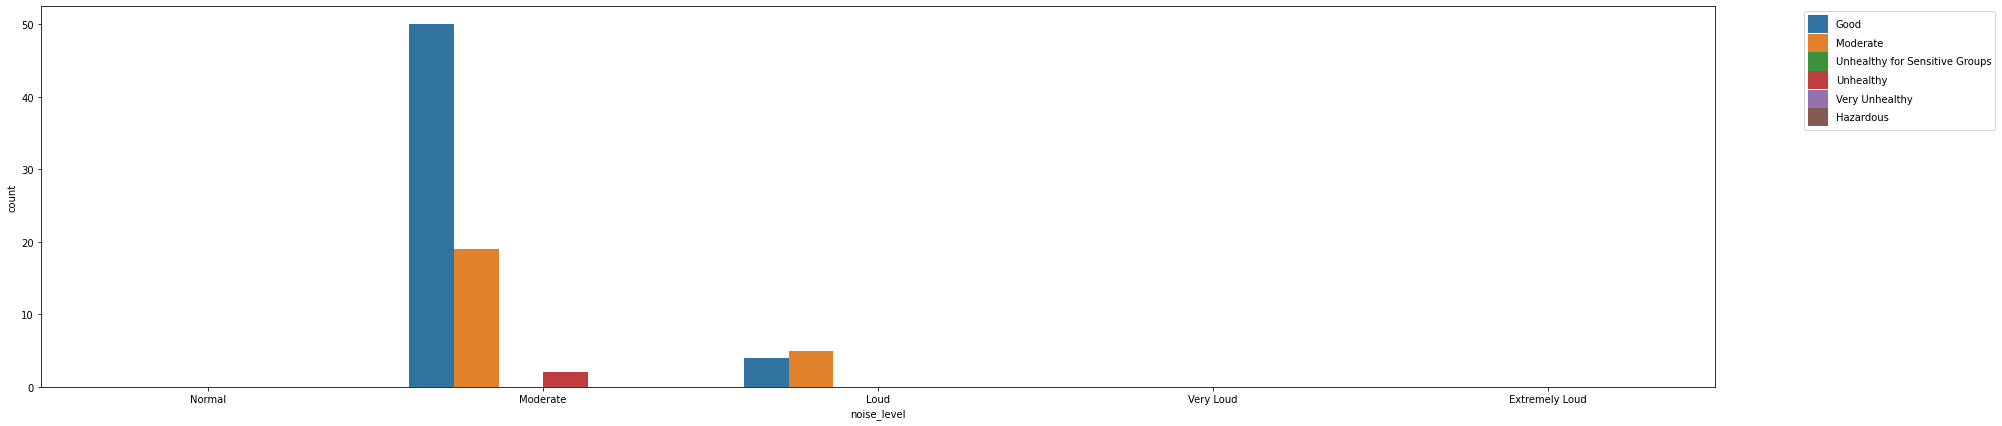

In [10]:
plt.figure(figsize=(30,7))
sns.countplot(data=cosa, x='noise_level', hue='AQI_pm2_5')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)

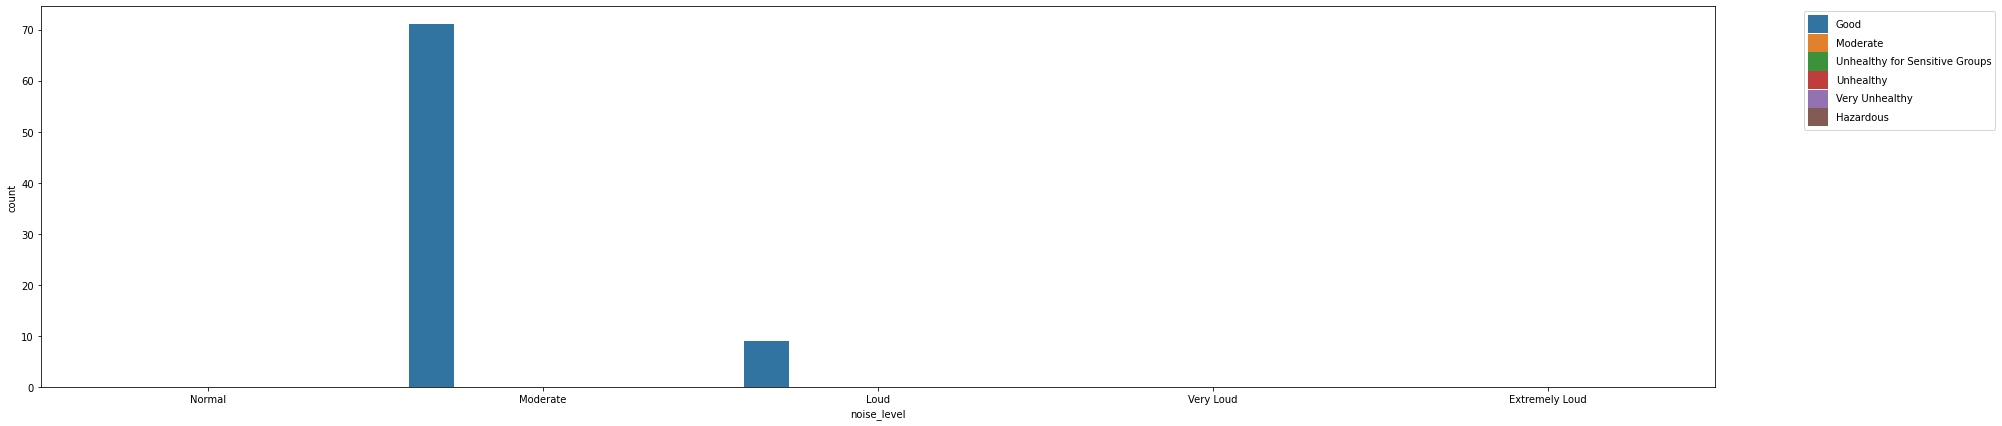

In [11]:
plt.figure(figsize=(30,7))
sns.countplot(data=cosa, x='noise_level', hue='AQI_pm10')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)

### Takeaways:
- 

___

In [12]:
cosa.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 80 entries, 2021-04-20 to 2021-07-08
Freq: D
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   celsius                     80 non-null     float64 
 1   farenheit                   80 non-null     float64 
 2   humidity                    80 non-null     float64 
 3   dewpoint_celsius            80 non-null     float64 
 4   dewpoint_farenheit          80 non-null     float64 
 5   pressure                    80 non-null     float64 
 6   Pm1_0                       80 non-null     float64 
 7   Pm2_5                       80 non-null     float64 
 8   Pm10                        80 non-null     float64 
 9   CO                          80 non-null     float64 
 10  most_hazardous_pm2.5_level  80 non-null     category
 11  most_hazardous_pm10_level   80 non-null     category
 12  most_hazardous_CO_level     80 non-null     category